In [ ]:

# 1. plot a graph to show the distribution of genre in the top 250 movies 
# 2. find out which movie has the maximum number of votes and which genre it belongs to and its duration.
# 3. find out which movie has the minimum number of votes and which genre it belongs to and its duration.
# 4. find out movies of each genre which has maximum number of votes. *

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
data=pd.read_csv("movies.csv")
df=pd.DataFrame(data)
print(df).head(10)

     rank   movie_id                     title  year   
0       1  tt0111161  The Shawshank Redemption  1994  \
1       2  tt0068646             The Godfather  1972   
2       3  tt0468569           The Dark Knight  2008   
3       4  tt0071562     The Godfather Part II  1974   
4       5  tt0050083              12 Angry Men  1957   
..    ...        ...                       ...   ...   
245   246  tt0071411               Dersu Uzala  1975   
246   247  tt1454029                  The Help  2011   
247   248  tt0103639                   Aladdin  1992   
248   249  tt0083987                    Gandhi  1982   
249   250  tt0099348        Dances with Wolves  1990   

                                     link imbd_votes  imbd_rating certificate   
0    https://www.imdb.com/title/tt0111161  2,711,075          9.3           R  \
1    https://www.imdb.com/title/tt0068646  1,882,829          9.2           R   
2    https://www.imdb.com/title/tt0468569  2,684,051          9.0       PG-13   
3  

AttributeError: 'NoneType' object has no attribute 'head'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [18]:
df.describe()

,rank,year,imbd_rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.306800
std,72.312977,25.125356,0.229006
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


# To convert (imbd_votes) object to int

In [23]:
df["imbd_votes"] = df["imbd_votes"].replace("[,,]", "", regex=True).astype(int)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    int32  
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [21]:
df.describe()

,rank,year,imbd_votes,imbd_rating
count,250.000000,250.000000,2.500000e+02,250.000000
mean,125.500000,1986.360000,6.477794e+05,8.306800
std,72.312977,25.125356,5.233661e+05,0.229006
min,1.000000,1921.000000,3.116700e+04,8.000000
25%,63.250000,1966.250000,2.237905e+05,8.100000
50%,125.500000,1994.000000,5.119530e+05,8.200000
75%,187.750000,2006.000000,9.677535e+05,8.400000
max,250.000000,2022.000000,2.711075e+06,9.300000


# 2. find out which movie has the maximum number of votes and which genre it belongs to and its duration.

In [24]:
df["imbd_votes"].max()

2711075

In [31]:
df1=df.loc[df["imbd_votes"]==2711075]
df1[["title","imbd_votes","genre","duration"]]

,title,imbd_votes,genre,duration
0,The Shawshank Redemption,2711075,Drama,2h 22m


# 3. find out which movie has the minimum number of votes and which genre it belongs to and its duration.

In [32]:
df["imbd_votes"].min()

31167

In [33]:
df1=df.loc[df["imbd_votes"]==31167]
df1[["title","imbd_votes","genre","duration"]]

,title,imbd_votes,genre,duration
245,Dersu Uzala,31167,"Adventure,Biography,Drama",2h 22m


# 4. find out movies of each genre which has maximum number of votes

In [40]:
gp=df.groupby("genre").agg({"imbd_votes":max})
gp

,imbd_votes
genre,
"Action,Adventure",976471
"Action,Adventure,Comedy",92925
"Action,Adventure,Drama",1895357
"Action,Adventure,Fantasy",1378156
"Action,Adventure,Mystery",331797
...,...
"Horror,Mystery,Thriller",679428
"Horror,Sci-Fi",892980
"Mystery,Romance,Thriller",407006


# plot a graph to show the distribution of genre in the top 250 movies

In [42]:
df[["genre","imbd_votes"]]

,genre,imbd_votes
0,Drama,2711075
1,"Crime,Drama",1882829
2,"Action,Crime,Drama",2684051
3,"Crime,Drama",1285350
4,"Crime,Drama",800954
...,...,...
245,"Adventure,Biography,Drama",31167
246,Drama,466011
247,"Animation,Adventure,Comedy",429219
248,"Biography,Drama,History",234688


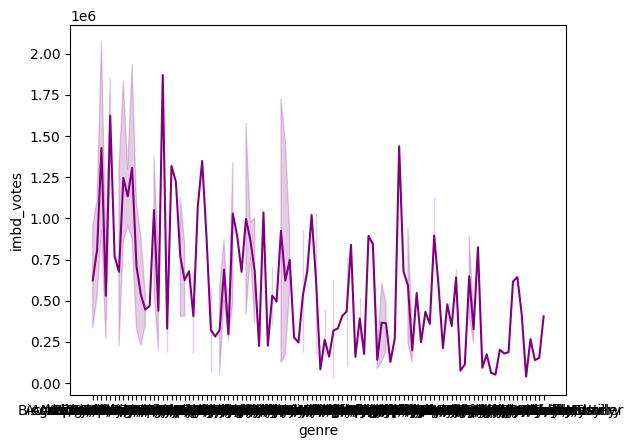

In [46]:
sns.lineplot(data=df,x="genre",y="imbd_votes",color="purple")
plt.show()